In [24]:
%matplotlib inline
import json
import pandas as pd
from collections import Counter
import matplotlib
from glob import glob

In [27]:
all_stats = {}
for jsonfile in glob('github.com/*/*/*.json'):
    with open(jsonfile) as jsonopenedfile:
        all_stats[jsonfile] = json.load(jsonopenedfile)

In [5]:
licenses = pd.Series(Counter([style_attributes['license'] for style_attributes in all_stats.values() if
                             style_attributes['license'] is not None]))

In [6]:
licenses.describe()

count     22.000000
mean      76.590909
std      178.130412
min        1.000000
25%        1.250000
50%       11.500000
75%       55.250000
max      805.000000
dtype: float64

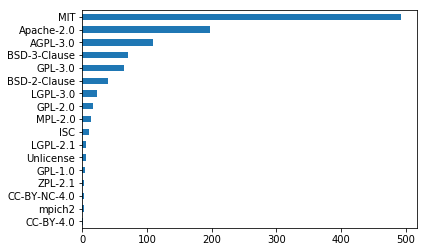

In [7]:
licenses = licenses.sort_values()
licenses.plot.barh()

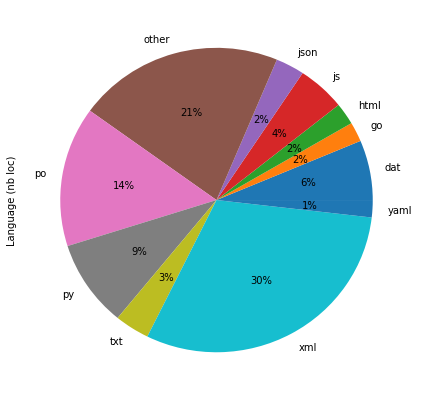

In [45]:
all_lines_of_code = Counter()
for stats in all_stats.values():
    all_lines_of_code.update(Counter(stats['lines_of_code']))
most_common = all_lines_of_code.most_common(10)
total = sum(all_lines_of_code.values())
other = total - sum(value for key, value in most_common)
most_common, total, other
most_common.append(('other', other))
pd.Series(dict(most_common), name="Language (nb loc)").plot.pie(figsize=(7, 7), autopct="%d%%")

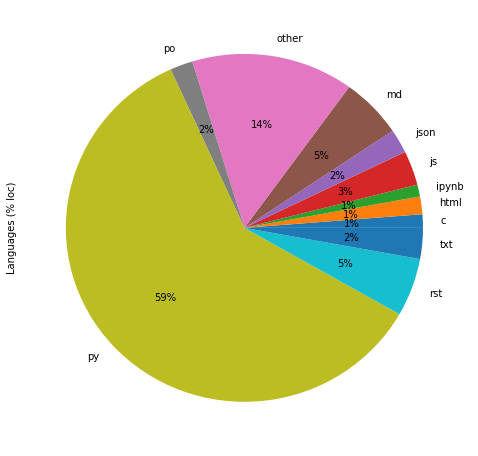

In [47]:
all_lines_of_code = Counter()
for stats in all_stats.values():
    total_lines_in_this_project = sum(stats['lines_of_code'].values())
    if total_lines_in_this_project == 0:
        continue
    percent_by_languages = Counter({key: value / total_lines_in_this_project for
                                    key, value in stats['lines_of_code'].items()})
    all_lines_of_code.update(percent_by_languages)
           

most_common = all_lines_of_code.most_common(10)
total = sum(all_lines_of_code.values())
other = total - sum(value for key, value in most_common)
most_common, total, other
most_common.append(('other', other))
pd.Series(dict(most_common), name="Languages (% loc)").plot.pie(figsize=(8, 8), autopct='%d%%')

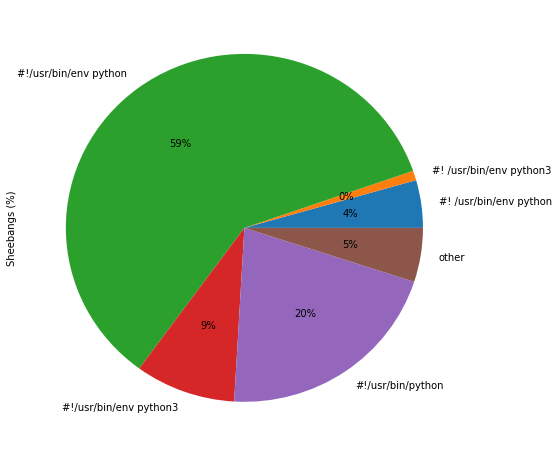

In [23]:
shebangs = Counter()
for to_update in [stat['shebang'] if 'shebang' in stat else {} for stat in all_stats.values()]:
iiiiiii    shebangs.update(to_update)
total = sum(shebangs.values())
most_common = dict(shebangs.most_common(5))
others = total - sum(most_common.values())
most_common['other'] = others
pd.Series(most_common, name="Sheebangs (%)").plot.pie(figsize=(8, 8), autopct='%d%%')

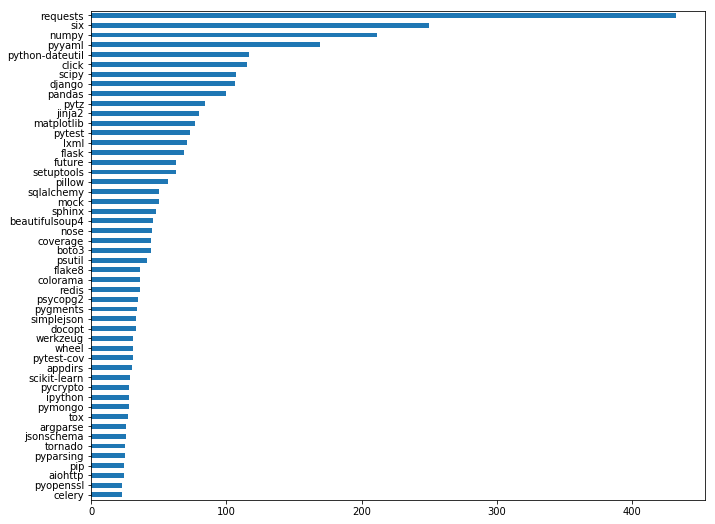

In [51]:
import re
from collections import OrderedDict

requirements = Counter()
for stat in all_stats.values():
    if 'requirements' not in stat:
        continue
    for requirement in stat['requirements']:
        requirements[re.split('[=<>]', requirement)[0]] += 1
total = sum(requirements.values())
most_common = OrderedDict(reversed(requirements.most_common(50)))
pd.Series(most_common, name="Requirements (%)").plot.barh(figsize=(11, 9))

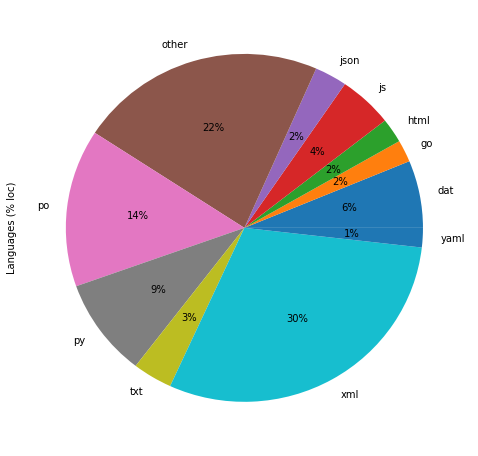

In [52]:
all_lines_of_code = Counter()
for stats in all_stats.values():
    all_lines_of_code.update(Counter(stats['lines_of_code']))
           

most_common = all_lines_of_code.most_common(10)
total = sum(all_lines_of_code.values())
other = total - sum(value for key, value in most_common)
most_common, total, other
most_common.append(('other', other))
pd.Series(dict(most_common), name="Languages (% loc)").plot.pie(figsize=(8, 8), autopct='%d%%')